In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#dataset given which contains the information of various users obtained from the social networking sites. 
#There is a car making company that has recently launched a new SUV car. 
#So the company wanted to check how many users from the dataset, wants to purchase the car

In [ ]:
import numpy as nm  
import matplotlib.pyplot as plt 
import pandas as pd  
  
#importing datasets  
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BIA/Machine Learning/Dataset/User_Data.csv')  

In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.shape

(400, 5)

In [ ]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
#Extracting Independent and dependent Variable  
X= df.iloc[:, [2,3]].values  
y= df.iloc[:, 4].values  

In [ ]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state=123)  

In logistic regression, we will do feature scaling because we want accurate result of predictions. Here we will only scale the independent variable because dependent variable have only 0 and 1 values. Below is the code for it:

In [ ]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

In [ ]:
#Fitting Logistic Regression to the training set  
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression() 
classifier.fit(x_train, y_train)  

LogisticRegression()

In [ ]:
y_pred= classifier.predict(x_test)  


In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test,y_pred)  
print(cm)

[[56  7]
 [10 27]]


<ipython-input-21-16a4b8a9861e>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


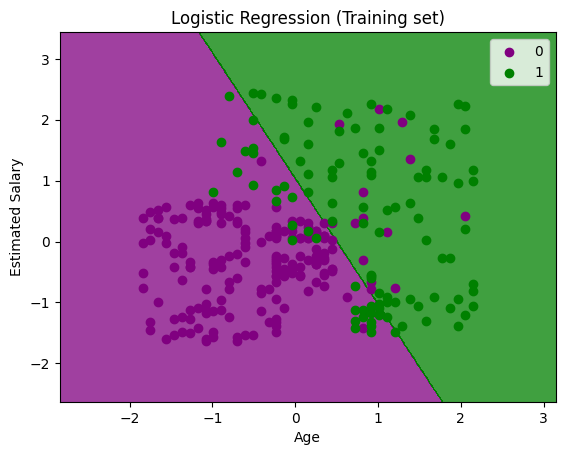

In [ ]:
#Visualizing the training set result  
from matplotlib.colors import ListedColormap  
x_set, y_set = x_train, y_train  
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
plt.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('purple','green' )))  
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  
for i, j in enumerate(nm.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('purple', 'green'))(i), label = j)  
plt.title('Logistic Regression (Training set)')  
plt.xlabel('Age')  
plt.ylabel('Estimated Salary')  
plt.legend()  
plt.show()  

The graph can be explained in the below points:

-In the above graph, we can see that there are some Green points within the green region and Purple points within the purple region.

-All these data points are the observation points from the training set, which shows the result for purchased variables.

-This graph is made by using two independent variables i.e., Age on the x-axis and Estimated salary on the y-axis.
-The purple point observations are for which purchased (dependent variable) is probably 0, i.e., users who did not purchase the SUV car.

-The green point observations are for which purchased (dependent variable) is probably 1 means user who purchased the SUV car.

-We can also estimate from the graph that the users who are younger with low salary, did not purchase the car, whereas older users with high estimated salary purchased the car.

-But there are some purple points in the green region (Buying the car) and some green points in the purple region(Not buying the car). So we can say that younger users with a high estimated salary purchased the car, whereas an older user with a low estimated salary did not purchase the car.



<ipython-input-22-00a3ea43c32f>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


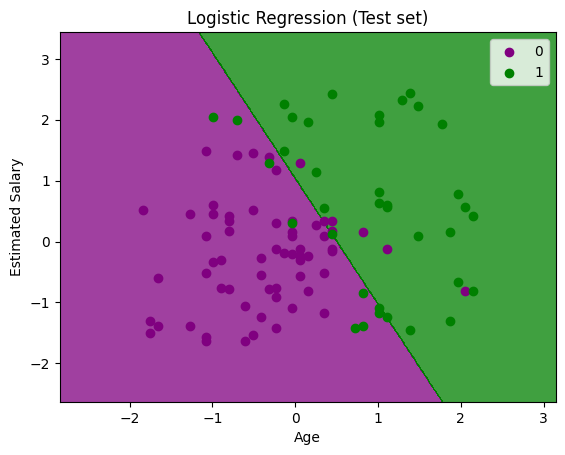

In [ ]:
#Visulaizing the test set result  
from matplotlib.colors import ListedColormap  
x_set, y_set = x_test, y_test  
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
plt.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('purple','green' )))  
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  
for i, j in enumerate(nm.unique(y_set)):  
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('purple', 'green'))(i), label = j)  
plt.title('Logistic Regression (Test set)')  
plt.xlabel('Age')  
plt.ylabel('Estimated Salary')  
plt.legend()  
plt.show()  

The above graph shows the test set result. As we can see, the graph is divided into two regions (Purple and Green). And Green observations are in the green region, and Purple observations are in the purple region. So we can say it is a good prediction and model. Some of the green and purple data points are in different regions, which can be ignored as we have already calculated this error using the confusion matrix (11 Incorrect output).